In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split, StratifiedKFold
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Lambda, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
path_root = "C:/Users/Sina/Desktop/Python/thesis code/main_data"

In [4]:
from keras.preprocessing.image import ImageDataGenerator
#batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000,class_mode='categorical')
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64, 64), batch_size=10000,shuffle=True, class_mode='sparse',interpolation="bilinear")



Found 3301 images belonging to 2 classes.


In [5]:
imgs, Labels = next(batches)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,Labels, test_size=0.3)

In [40]:
def load_data_kfold(k):
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train

k = 7
folds, X_train, y_train = load_data_kfold(k)

C:\Users\Sina\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Sina\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

In [43]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [44]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model_vgg16_conv = VGG16( include_top=False, pooling='avg')
#model_vgg16_conv.trainable = False
model_vgg16 = Sequential()
# use vgg as feature extractor
model_vgg16.add(model_vgg16_conv)
# add two hidden layers for classification
model_vgg16.add(Dense(512, activation=('relu')))
model_vgg16.add(Dense(256, activation=('relu')))
# add the prediction layer
model_vgg16.add(Dense(2, activation=('softmax')))

In [45]:
model_vgg16.compile(loss='sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001), metrics=['acc'])

In [46]:
batch_size=64

gen = ImageDataGenerator(horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         zoom_range = 0.1,
                         rotation_range = 10
                        )

In [49]:
for j, (train_idx, val_idx) in enumerate(folds):
    
    print('\nFold ',j)
    X_train_cv = X_train[train_idx]
    y_train_cv = y_train[train_idx]
    X_test_cv = X_train[val_idx]
    y_test_cv= y_train[val_idx]
    
#     name_weights = "final_model_fold" + str(j) + "_weights.h5"
#     callbacks = get_callbacks(name_weights = name_weights, patience_lr=10)
#     generator = gen.flow(X_train_cv, y_train_cv, batch_size = batch_size)
#     model = get_model()
#     model.fit_generator(
#                 generator,
#                 steps_per_epoch=len(X_train_cv)/batch_size,
#                 epochs=15,
#                 shuffle=True,
#                 verbose=1,
#                 validation_data = (X_valid_cv, y_valid_cv),
#                 callbacks = callbacks)
    VGG16_history = model_vgg16.fit(X_train_cv, y_train_cv, validation_data=(X_test_cv, y_test_cv), epochs=10)
    
    #print(model.evaluate(X_valid_cv, y_valid_cv))


Fold  0
Epoch 1/10
62/62 [==============================] - 139s 2s/step - loss: 0.1380 - acc: 0.9469 - val_loss: 0.5784 - val_acc: 0.7734
Epoch 2/10
62/62 [==============================] - 141s 2s/step - loss: 0.1204 - acc: 0.9550 - val_loss: 0.6620 - val_acc: 0.7644
Epoch 3/10
62/62 [==============================] - 142s 2s/step - loss: 0.0978 - acc: 0.9641 - val_loss: 0.6646 - val_acc: 0.7432
Epoch 4/10
62/62 [==============================] - 142s 2s/step - loss: 0.0849 - acc: 0.9727 - val_loss: 0.7148 - val_acc: 0.7613
Epoch 5/10
62/62 [==============================] - 142s 2s/step - loss: 0.0875 - acc: 0.9697 - val_loss: 0.6759 - val_acc: 0.7704
Epoch 6/10
62/62 [==============================] - 142s 2s/step - loss: 0.0594 - acc: 0.9793 - val_loss: 0.7314 - val_acc: 0.7734
Epoch 7/10
62/62 [==============================] - 142s 2s/step - loss: 0.0573 - acc: 0.9798 - val_loss: 0.8695 - val_acc: 0.7402
Epoch 8/10
62/62 [==============================] - 164s 3s/step - loss: 0

In [50]:
scores = model_vgg16.evaluate(X_test_cv, y_test_cv)

11/11 [==============================] - 4s 372ms/step - loss: 3.4542e-04 - acc: 1.0000


In [51]:
print('Final VGG16 accuracy: ', scores[1])

Final VGG16 accuracy:  1.0


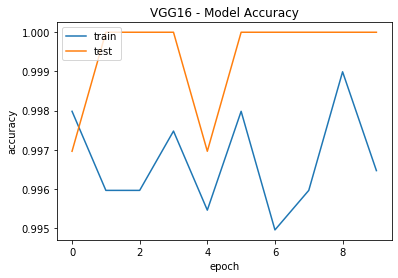

In [52]:
plt.plot(VGG16_history.history['acc'])
plt.plot(VGG16_history.history['val_acc'])
plt.title('VGG16 - Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.xticks([])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

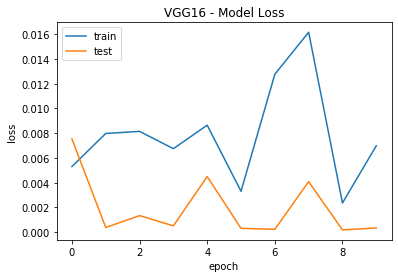

In [53]:
plt.plot(VGG16_history.history['loss'])
plt.plot(VGG16_history.history['val_loss'])
plt.title('VGG16 - Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
model_vgg16.save('model.h5')